In [69]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [70]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple.
# If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes,
# where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.


In [71]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [72]:
#Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [73]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [3]:
cities

NameError: name 'cities' is not defined

In [75]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [76]:
# Starting URL for Weather Map API Call.
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=bceea34aff044c5810e5ca6a1acd9a39


In [77]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    


Beginning Data Retrieval     
-----------------------------


NameError: name 'cities' is not defined

In [78]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pitea,65.3172,21.4794,33.89,92,99,4.56,SE,2022-04-10 16:24:56
1,Chuy,-33.6971,-53.4616,77.16,57,2,12.84,UY,2022-04-10 16:24:56
2,Cidreira,-30.1811,-50.2056,74.55,79,5,12.86,BR,2022-04-10 16:24:57
3,Praia Da Vitoria,38.7333,-27.0667,61.05,63,75,28.68,PT,2022-04-10 16:24:58
4,Port Alfred,-33.5906,26.8910,64.18,93,100,5.01,ZA,2022-04-10 16:24:59
5,Dingle,10.9995,122.6711,73.49,92,100,4.00,PH,2022-04-10 16:22:39
6,Bluff,-46.6000,168.3333,48.40,87,28,8.88,NZ,2022-04-10 16:25:00
7,Hobart,-42.8794,147.3294,54.05,63,75,3.44,AU,2022-04-10 16:25:01
8,Rikitea,-23.1203,-134.9692,78.87,73,3,17.45,PF,2022-04-10 16:25:02
9,Torbay,47.6666,-52.7314,48.27,88,75,8.05,CA,2022-04-10 16:24:21


In [79]:
city_data_df = city_data_df[['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pitea,SE,2022-04-10 16:24:56,65.3172,21.4794,33.89,92,99,4.56
1,Chuy,UY,2022-04-10 16:24:56,-33.6971,-53.4616,77.16,57,2,12.84
2,Cidreira,BR,2022-04-10 16:24:57,-30.1811,-50.2056,74.55,79,5,12.86
3,Praia Da Vitoria,PT,2022-04-10 16:24:58,38.7333,-27.0667,61.05,63,75,28.68
4,Port Alfred,ZA,2022-04-10 16:24:59,-33.5906,26.8910,64.18,93,100,5.01
5,Dingle,PH,2022-04-10 16:22:39,10.9995,122.6711,73.49,92,100,4.00
6,Bluff,NZ,2022-04-10 16:25:00,-46.6000,168.3333,48.40,87,28,8.88
7,Hobart,AU,2022-04-10 16:25:01,-42.8794,147.3294,54.05,63,75,3.44
8,Rikitea,PF,2022-04-10 16:25:02,-23.1203,-134.9692,78.87,73,3,17.45
9,Torbay,CA,2022-04-10 16:24:21,47.6666,-52.7314,48.27,88,75,8.05


In [80]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [81]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

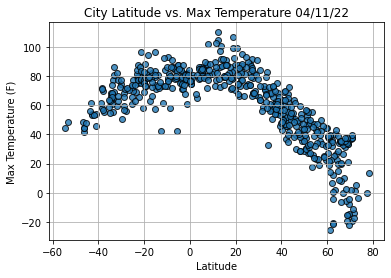

In [50]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

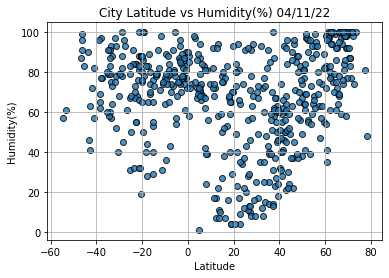

In [57]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Humidity(%) "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/humidity.png")

# Show plot.
plt.show()

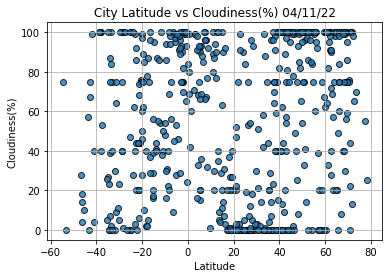

In [56]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Cloudiness(%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/cloudiness.png")

# Show plot.
plt.show()

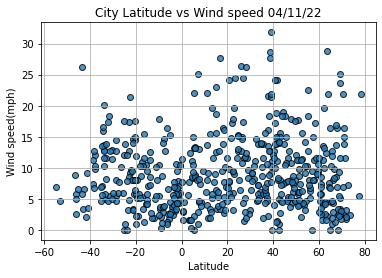

In [55]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Wind speed "+ time.strftime("%x"))
plt.ylabel("Wind speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/wind_speed.png")

# Show plot.
plt.show()

In [ ]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

In [86]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [82]:
index13 = city_data_df.loc[13]
index13

City                    Cape Town
Country                        ZA
Date          2022-04-10 16:23:08
Lat                      -33.9258
Lng                       18.4232
Max Temp                    74.26
Humidity                       60
Cloudiness                      0
Wind Speed                  12.66
Name: 13, dtype: object

In [83]:
# Filterig data frame for Latitudes north of the equator 
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pitea,SE,2022-04-10 16:24:56,65.3172,21.4794,33.89,92,99,4.56
3,Praia Da Vitoria,PT,2022-04-10 16:24:58,38.7333,-27.0667,61.05,63,75,28.68
5,Dingle,PH,2022-04-10 16:22:39,10.9995,122.6711,73.49,92,100,4.00
9,Torbay,CA,2022-04-10 16:24:21,47.6666,-52.7314,48.27,88,75,8.05
11,Jamestown,US,2022-04-10 16:23:53,42.0970,-79.2353,36.72,46,100,14.97


In [87]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

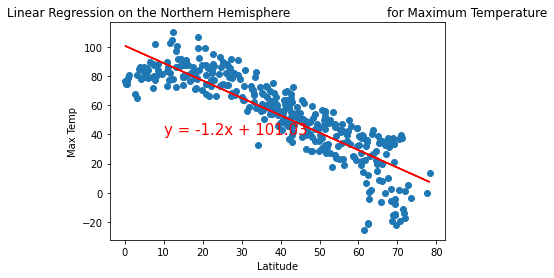

In [88]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

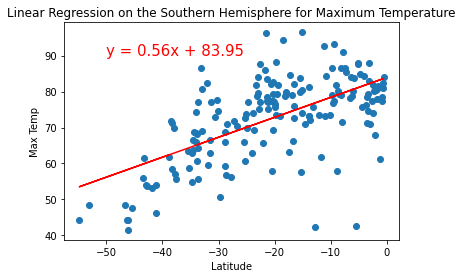

In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

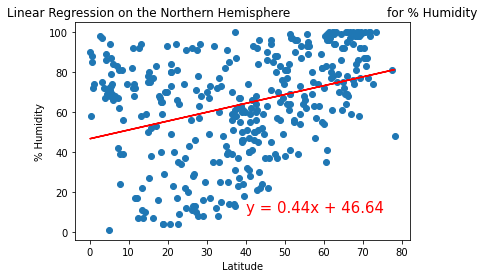

In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

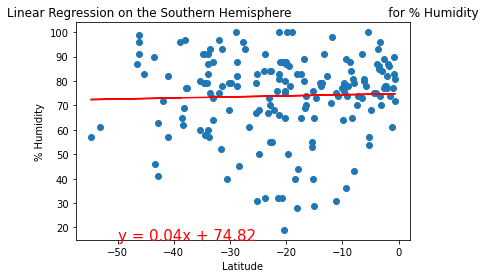

In [94]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

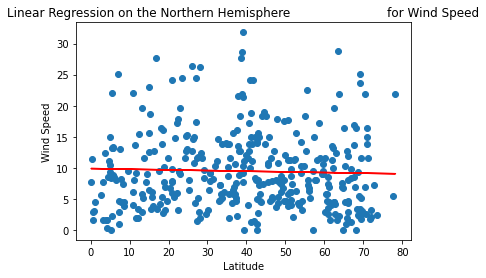

In [96]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

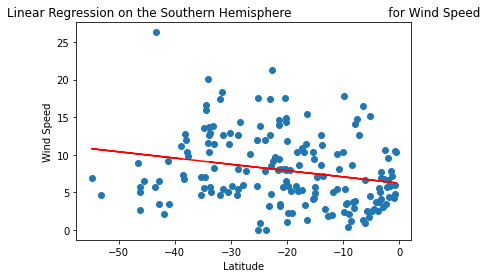

In [98]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))